In [48]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt
import scipy.stats as st
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("AB_Testing Dataset.csv")
df.columns = df.columns.str.strip()

In [50]:
df["conversion_rate"] = df["total_carts"] / df["total_visitors"]

In [51]:
df = df.dropna(subset=["conversion_rate"])
df = df[df["total_visitors"] > 0]

In [52]:
control_group = "Saudi Arabia"
variant_group = "United States"

control_data = df[df["location_country"] == control_group]["conversion_rate"]
variant_data = df[df["location_country"] == variant_group]["conversion_rate"]


In [53]:
summary = (
    df.groupby("location_country")["conversion_rate"]
    .agg(["mean", "std", "count"])
    .reset_index()
    .rename(columns={"mean": "mean_rate", "std": "std_rate"})
)

print("\nSummary by group:")
print(summary)


Summary by group:
        location_country  mean_rate  std_rate  count
0                Algeria   0.000000       NaN      1
1                 Canada   0.000000       NaN      1
2                  Egypt   1.000000       NaN      1
3                Germany   0.000000       NaN      1
4                  India   0.000000       NaN      1
5                Ireland   0.000000       NaN      1
6                 Kuwait   0.000000       NaN      1
7                   Oman   0.000000  0.000000      3
8           Saudi Arabia   0.122601  0.293612    232
9                 Turkey   0.333333  0.577350      3
10  United Arab Emirates   0.000000       NaN      1
11        United Kingdom   0.000000  0.000000      3
12         United States   0.035211  0.175742     71


In [54]:
def confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    se = stats.sem(data)  # standard error
    h = se * st.t.ppf((1 + confidence) / 2., n-1)
    return mean, mean-h, mean+h

mean_c, lower_c, upper_c = confidence_interval(control_data)
mean_v, lower_v, upper_v = confidence_interval(variant_data)

print(f"\n{control_group} Mean: {mean_c:.4f} | 95% CI: [{lower_c:.4f}, {upper_c:.4f}]")
print(f"{variant_group} Mean: {mean_v:.4f} | 95% CI: [{lower_v:.4f}, {upper_v:.4f}]")



Saudi Arabia Mean: 0.1226 | 95% CI: [0.0846, 0.1606]
United States Mean: 0.0352 | 95% CI: [-0.0064, 0.0768]


In [55]:
if len(control_data) > 1 and len(variant_data) > 1:
    t_stat, p_value = stats.ttest_ind(control_data, variant_data, equal_var=False)
else:
    t_stat, p_value = None, None
    print("\n Not enough data in one or both groups for a t-test.")


In [56]:
if p_value is not None:
    print(f"\nMean Conversion Rate - {control_group}: {control_data.mean():.4f}")
    print(f"Mean Conversion Rate - {variant_group}: {variant_data.mean():.4f}")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05
    if p_value < alpha:
        print("Significant difference — reject H₀. The change likely has an effect.")
    else:
        print(" No significant difference — fail to reject H₀.")
else:
    print(" Statistical test skipped due to insufficient data.")


Mean Conversion Rate - Saudi Arabia: 0.1226
Mean Conversion Rate - United States: 0.0352
T-statistic: 3.0770
P-value: 0.0024
Significant difference — reject H₀. The change likely has an effect.


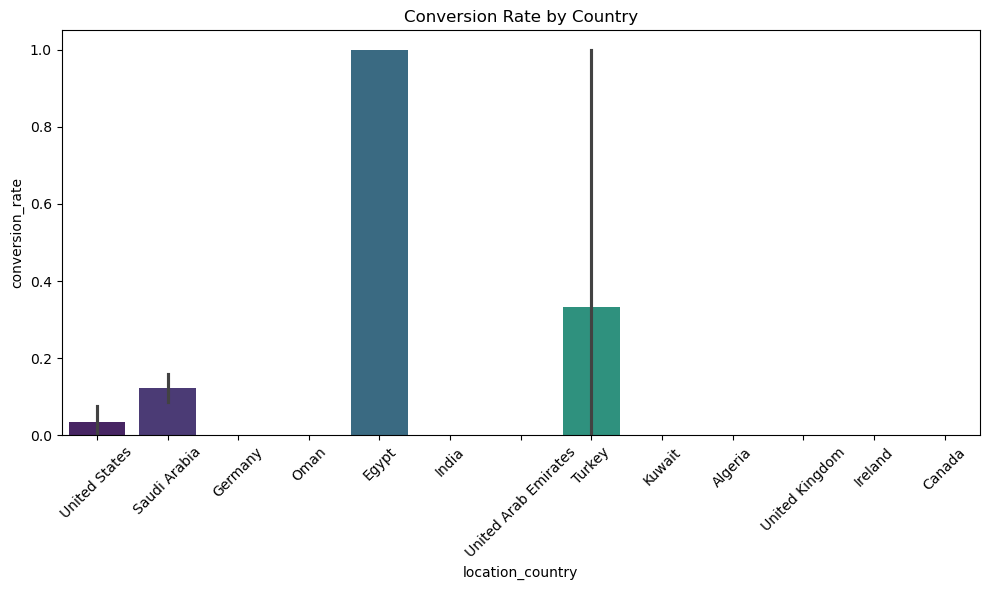

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="location_country",
    y="conversion_rate",
    hue="location_country",  # fixes Seaborn palette warning
    legend=False,
    errorbar=('ci', 95),
    palette="viridis"
)
plt.xticks(rotation=45)
plt.title("Conversion Rate by Country")
plt.tight_layout()
plt.show()

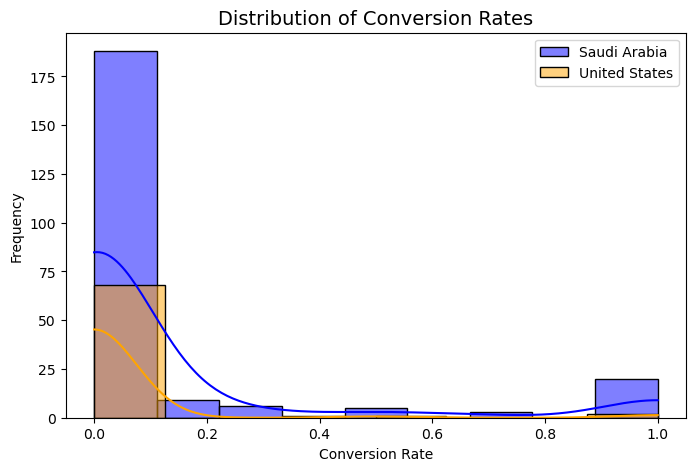

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(control_data, color="blue", label=control_group, kde=True)
sns.histplot(variant_data, color="orange", label=variant_group, kde=True)
plt.title("Distribution of Conversion Rates", fontsize=14)
plt.xlabel("Conversion Rate")
plt.ylabel("Frequency")
plt.legend()
plt.show()
